In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [67]:
import tensorflow as tf

import numpy as np
import pandas as pd

print(tf.version.VERSION)

2.1.0


In [49]:
def transformJsonToPhotosURL():
    pd.read_json('data.json')
    photos_list = []
    for photoURL in data['geojson']['features']:
        filename = photoURL['properties']['filename']
        photos_list.append(filename)
    return photos_list

In [50]:
photosUrl = transformJsonToPhotosURL()

In [74]:
import cv2
import os

labels = ['plastic', 'paper', 'metal']

img_size = 224
def convertByCV2(data_dir):
    data = [] 
    
    for label in labels: 
        print(label)
        
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
                
                
            except Exception as e:
                print(e)
                
    return np.array(data)

In [75]:
convertPhotos = convertByCV2(photosUrl)

plastic


TypeError: expected str, bytes or os.PathLike object, not list

In [68]:
import boto3
import matplotlib.pyplot as plt 


def readPhotosFromS3():
    s3_bucket, s3_key = '', ''


SyntaxError: invalid syntax (<ipython-input-68-2a5d67a989ff>, line 5)

In [87]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import boto3

# 'https://olm-s3.s3.eu-west-1.amazonaws.com/2021/01/04/IMG_1711.HEIC',

s3 = boto3.resource('s3', region_name='eu-west-1')
bucket = s3.Bucket('olm')

object = bucket.Object('2021/01/04/IMG_1711.HEIC')
object.download_file('2021/01/04/IMG_1711.HEIC')
img=mpimg.imread('B01.jp2')
imgplot = plt.imshow(img)

plt.show(imgplot)

ClientError: An error occurred (403) when calling the HeadObject operation: Forbidden

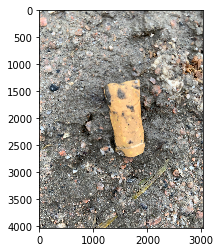

In [86]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from io import BytesIO

url = "https://olm-s3.s3.eu-west-1.amazonaws.com/2021/01/04/IMG_1711.HEIC"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.show()


In [88]:
def testTransformJsonToPhotosURL():
    pd.read_json('data.json')
    photos_list = []
    for photoURL in data['geojson']['features']:
        filename = photoURL['properties']['filename']
        photos_list.append(filename)
    return photos_list

In [89]:
photosUrl = testTransformJsonToPhotosURL()

In [90]:
#create dataset for train

In [91]:
photosUrl

['https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/AD7E4301-F370-40D3-9B3D-9EAD2127B3B7.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/667CFD00-A9DF-492B-BEB5-FA59D8898F09.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/5574F715-555C-4218-91C0-CE14B81F7F14.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/E6F480D6-30CC-493E-9D8C-A57AE4609046.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/352182AE-7E83-49E9-91B8-68887FBF9FFC.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/F5148BB9-7CBC-407F-BEA0-17A748058FCD.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/09/170AD192-FC48-4AB3-99F1-2FD5FCCBD642.jpg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/08/6569.png',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/08/6571.png',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/08/6573.png',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/08/6574.png',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/0

In [96]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(photosUrl)

In [99]:
train

['https://olm-s3.s3.eu-west-1.amazonaws.com/2020/06/16/OkVEgtIaVMB3KekMtFjKcGM0WRcGcPLLQ7b33wKR.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/1970/01/19/IMG_1484.MOV',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/27/8ez7oS914GU40nutuWbBmykSHXKTjKZOl5AgtmkV.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/08/09/NT76khxfh4w86x57O3t1ipQq4tRkofsMqlVDGrPR.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/05/23/DiGzf72USIPTYN9wNky2EDVt2qFDX5d2MyhdJHmq.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/08/06/IADEoepxVdLgcBG1zMbuVyjvsZ4CVrFL52bE9xpZ.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/09/12/wEBAN587wq1H3go40uh9VYklDmW7gi9hUyyi54Eq.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/06/12/0uGxjIDjqj7dhCaI4Yw9Bkkg8exeo14j8UH8Nvq0.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/08/18/yr0KWAQkS64E3ryNywpEnpahAIqoYTzCwtH9VbOU.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/01/16/Cq0KJ9gaWJVXyl4r6ch67dXUCFNRclU9cO0NydFw.jpeg',
 'h

In [105]:
test

['https://olm-s3.s3.eu-west-1.amazonaws.com/2020/04/26/Bapgg2OCcdAvwfLf17IxregagaJe22vJHnS7nJVA.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/07/16/HodWMk2iYw2C9whh64Xviwtg5paulm2FaanmzVEj.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/05/26/FXGy2esawYaUrcRLleO0qUS3vX3kXRm8URa4Y9O5.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/09/19/htXc5ffLERv6BaBXsMA8rWU29dgfdDPX1rq1LnYG.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/06/22/V5Ajx0e4WvF2Q2uwgu87QkMkAHZzwVTsPVIqzii9.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/10/23/0v6pOBh43gQKh1Ft1dA6uXj4DTj5H1XujYFdlrJn.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2019/08/24/GOZjkQXsqwF7fvr515CNV5XthB0KOXhXs4LEWjCX.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/09/19/4MBneZRAFb8FehqQDZkJ4R2Ua7P6ay9AtOnkia8j.jpeg',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/02/01/10734.png',
 'https://olm-s3.s3.eu-west-1.amazonaws.com/2020/07/16/oSuFmlUfIjgSDFsdMGamJW7bkvJYPfmbMXPvrETh.jpeg',
 'http

In [106]:
len(train)

41600

In [107]:
len(test)

13867

In [130]:
model = Sequential()

In [131]:
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))

In [132]:
model.add(MaxPool2D())

In [133]:
model.add(Conv2D(32, 3, padding="same", activation="relu"))

In [136]:
model.add(MaxPool2D())

In [137]:
model.add(Conv2D(64, 3, padding="same", activation="relu"))

In [138]:
model.add(MaxPool2D())

In [139]:
model.add(Dropout(0.4))

In [140]:
model.add(Flatten())

In [141]:
model.add(Dense(128,activation="relu"))

In [142]:
model.add(Dense(128,activation="relu"))

In [162]:
model.summary()

AttributeError: 'list' object has no attribute 'summary'

In [135]:
def testTransformJsonToProperty(property):
    pd.read_json('data.json')
    photos_list = []
    for photoURL in data['geojson']['features']:
        filename = photoURL['properties'][property]
        photos_list.append(filename)
    return photos_list